In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.55446976],
       [2.61357822]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.55446976],
       [9.7816262 ]])

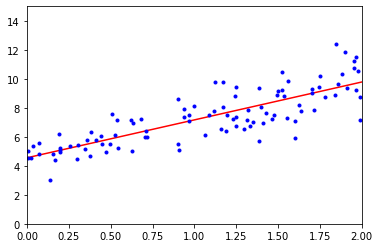

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.55446976],
       [9.7816262 ]])

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.55446976],
       [2.61357822]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.55446976],
       [2.61357822]])

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.55446976],
       [2.61357822]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.51030695],
       [2.587805  ]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.58521969]), array([2.68645338]))

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-2.35636649,  5.55246304])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99054937]), array([[0.99668826, 0.54032705]]))

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

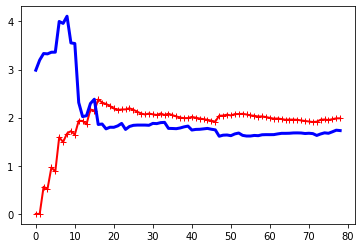

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

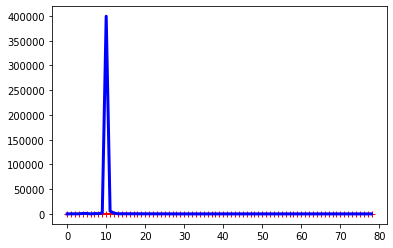

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.08017052]])

In [22]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.07226225])

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.03920608])

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.04170953])

In [25]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

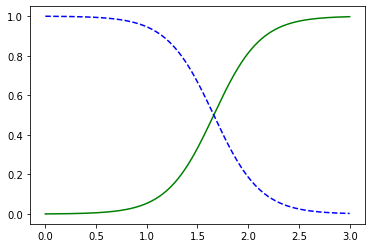

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')

In [29]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [30]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,3]])

array([[8.83643458e-10, 8.64916081e-05, 9.99913508e-01]])

# Exercises

### Question 1

1. Which Linear Regression training algorithm can you use if you have a training set with 
millions of features?

Stochastic Gradient Descent or Mini-Batch gradient descent as these both work with individual 
data points. You would use Batch Gradient Descent if you can fit every instance in memory.
Ultimately, do not use Normal Equation or SVD as the complexity ramps up significantly with the 
number of features.

2. Suppose the features in your training set have very different scalers. Which algorithms 
might suffer from this, and how? What can you do about it?

Gradient Descent will not work well due to the amount of time required to converge, however 
SVD and Normal equation would work fine. A solution to get Gradient Descent to work is to 
scale your model appropriately. Scaling your model with the support of scikit learn ensures 
that you get a model within a certain range. 

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression Model?

No, Gradient Descent does not get stuck in a local minimum, as it will always converge to 
global minimum due to Logistic Regression being a convex function.

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long 
enough?

All Gradient Descent algorithms can lead to the same model, given a couple key conditions. 
The functions being evaluated need to be convex so that a minimum exists. Second, 
The learning rate cannot be too high. If the learning rate is even slightly too high for 
Stochastic and Mini-Batch Gradient Descent, then they will bounce around the minimum and
 never meet it.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. 
If you notice that the validation error consistently goes up, what is likely going on? 
How can you fix this?

If the validation error begins to consistently go up, then your learning rate is too high, 
and thus the solution is diverging. Adjusting the learning rate will assist in ensuring your 
validation errors go down and your function converges. If your training errors also go up, 
despite a fix to the learning rate, then you are overfitting and will need to early stop to 
get an optimal solution.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error 
goes up?

No, Mini Batch may jump around the global optimum, so the validation error may go up and back 
down a couple times. An optimal solution would be to check in specific intervals for the lowest 
error, and if Mini-Batch Gradient Descent goes up too many times, revert to the best solution.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the 
optimal solution the fastest? Which will actually converge? How can you make the others converge 
as well?

The fastest converging Gradient Descent algorithm is Stochastic Gradient Descent. 
Next is mini-batch, and then Batch. The reason being is related to the amount of samples each 
Gradient Descent algorithms need, where Stochastic uses just one, mini batch uses less than all
and more than 1, and Batch uses all instances each training. They can all converge as well,
however Stochastic and mini-batch need a low enough learning rate in order to do so.

8. Supposed you are using Polynomial Regression. You plot the learning curve and you notice
that there is a large gap between the training error and the validation error. What is happening?
What are three ways to solve this?

You are most likely overfitting to your training data, which is why your validation data learning
curve is so far from your training data curve. You can solve this by reducing the degree of 
polynomials within your polynomial regression, regularize your model to not overfit as much,
or increase the size of the training set.

9. Suppose you are using Ridge Regression and you notice that the training error and the
validation error are almost equal and fairly high. Would you say that the model suffers from
high bias or high variance? Should yu increase the regularization hyperparameter alpha
or reduce it?

I would say this model suffers from high bias. This being the case, the hyperparameter alpha
should be decreased.

10. Why would you want to use:
    
    a. Ridge Regression instead of plain Linear Regression(i.e., without any regularization)?
    b. Lasso instead of Ridge Regression?
    c. Elastic Net instead of lasso?
    

 
a. You would want to use Ridge Regression if you need to help reduce overfitting in your
model. Also, models with some form of regularization tend to perform better than those with none.
b. Lasso Regression is great for giving some ideas of feature selection, as well as dealing
with smaller sample sizes. This works because l1 regularization pushes weights down to zero for 
features with less importance, creating a sparse solution and showing your most important features.
Lasso is thus most useful when you believe to have less important features.
c. Elastic Net is often preferred over Lasso as Lasso has moments of working incorrectly. 
Situations that cause incorrect Lasso functioning is when there are more features than training
instances or when features are highly correlated. For this purpose, you're better off using an
l1 regression with the l1 ratio near 1.
 

 
 11. Suppose you want to classify pictures as an outdoor/indoor and daytime/nightime. Should
 you implement two Logistic Regression classifiers or one Softmax Regression classifier?
 

 
 Since the two options are non conflicting pairs (you can have outdoor/daytime, outdoor/nightime,
 etc.) you should train two Logistic Regression models. If these combintations were not allowed,
 a Softmax regression would be ideal.

 
 12. Implement Batch Gradient Descent with early stopping for Softmax Regression
 (without using Scikit-Learn). 
 

In [33]:
X = iris['data'][:, (2,3)]
y = iris['target']

X_with_bias = np.c_[np.ones([len(X), 1]), X]

np.random.seed(2042)

In [35]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [39]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [40]:
y_train[:10]

array([1, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [41]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [42]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)


In [43]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums


In [44]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [45]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 2.0098317606794267
500 0.7775485994012683
1000 0.6358595299644286
1500 0.5538541523238559
2000 0.5002301566083223
2500 0.46167353758270924
3000 0.4320630708690128
3500 0.4082683127711592
4000 0.3885249426733036
4500 0.37175450310553104
5000 0.3572529720955708


In [46]:
Theta

array([[ 3.30012252, -0.19360882, -3.26721327],
       [-1.20747709, -0.58488635, -0.4152438 ],
       [-2.1970059 ,  0.25677352,  1.72547638]])

In [47]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.8666666666666667

In [48]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 2.968736899582155
500 0.5197864820932234
1000 0.4910558310637946
1500 0.48254537680629156
2000 0.4793184131301125
2500 0.47798748905462335
3000 0.47741514348123937
3500 0.4771630781432381
4000 0.47705044259988794
4500 0.47699964640820014
5000 0.4769766014877877


In [49]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [50]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.119860073542396
500 0.6074585620713205
1000 0.5831184619279911
1500 0.5744283072986138
2000 0.5706813846035395
2500 0.5689214022921245
3000 0.5680386182532973
3500 0.5675697916096856
4000 0.5673078372418874
4500 0.5671548474136497
5000 0.5670621150573834


In [51]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

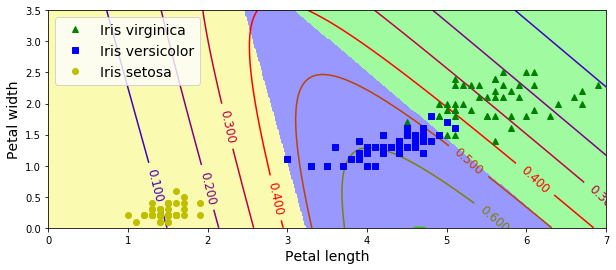

In [52]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [53]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

1.0